# 0. Introdução

**Trabalho Clustering**:

Aluno: Gabriel Luiz

Disciplina: Tópico em Aprendizado de Máquina

**Objetivos** :

- Escolha dois datasets rotulados.
- Realize a análise estatística, visualização e pré-processamento dos
dados.
- Realize os experimentos criando duas bases de teste distintas:
- - considerando todos os atributos do dataset;
- - selecionando alguns atributos e descartando outros.
- Aplique três métodos de classificação distintos nas duas bases
acima referentes a cada dataset.
- Para cada dataset, em cada uma das bases, analise os resultados
segundo medidas de qualidade de classificação, usando índices de
validação externa (acurácia, recall, precisão, F-measure, índice
Kappa) e cruva ROC.
- Proponha uma maneira adicional de comparar os resultados obtidos
além das medidas acima.
- Compare e interprete os resultados dos dois experimentos em cada
dataset. Faça tabela com as medidas de validação

## 0.1 Dependências

Para realização da tarefa foram utilizados as seguintes bibliotecas:

In [202]:
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn.cluster import *
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

# KFold
from sklearn.model_selection import KFold
import random

# Classificadores
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from  sklearn.metrics  import  roc_auc_score
from sklearn.metrics import balanced_accuracy_score


# 1. Dados

Para realização das tarefas envolvidas neste relatório utilizou-se o arquivo **dim032.csv** que contém dados não descritos, onde foram feitos para a realização de clustering que se encontram no site:
http://cs.uef.fi/sipu/datasets/

## 1.1 Carregamento do arquivo

In [203]:
from clustering.labelMatch import rotulos, labelmatch
dataset = './dataset/dim032/dim032.csv'
clusters = './dataset/dim032/dim032-pa.csv'

In [204]:
data = pd.read_csv(
    dataset,
    header = None
    )

label = pd.read_csv(
    clusters,
    header = None
    )

In [205]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,84,152,100,52,95,186,169,106,37,186,...,190,65,214,116,75,55,123,65,154,177
1,86,149,101,56,93,181,171,116,37,192,...,191,79,215,116,76,60,130,71,151,181
2,83,149,99,51,96,187,169,108,34,191,...,190,65,213,118,73,55,125,63,155,178
3,86,142,101,64,105,183,172,116,49,180,...,186,69,209,120,68,56,123,67,144,181
4,89,145,108,54,91,180,175,107,35,192,...,188,67,212,118,91,50,135,58,147,165


In [206]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,...,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,95.626953,109.116211,112.750000,127.612305,139.097656,130.491211,142.145508,134.344727,97.023438,135.126953,...,120.544922,154.849609,123.900391,123.157227,105.608398,122.179688,130.062500,130.897461,106.218750,116.990234
std,33.615901,56.908917,51.135914,48.141948,59.470162,39.287918,45.671907,59.378414,42.142075,66.366363,...,67.089616,60.070835,58.308579,55.723743,48.049909,58.800397,61.676195,55.330114,47.630102,55.882102
min,30.000000,40.000000,40.000000,41.000000,28.000000,48.000000,48.000000,25.000000,24.000000,29.000000,...,29.000000,39.000000,28.000000,25.000000,24.000000,28.000000,40.000000,51.000000,41.000000,34.000000
25%,73.000000,56.000000,72.000000,81.750000,88.000000,104.000000,106.000000,79.000000,63.000000,58.500000,...,53.000000,118.750000,69.000000,87.500000,61.000000,56.000000,64.000000,88.000000,67.000000,74.000000
50%,88.500000,97.000000,97.000000,142.000000,169.000000,129.000000,159.000000,145.000000,85.000000,169.500000,...,111.500000,176.000000,117.500000,116.000000,113.000000,138.000000,143.000000,118.500000,102.000000,97.000000
75%,121.000000,145.000000,168.000000,162.000000,186.000000,150.000000,171.000000,188.750000,134.750000,187.000000,...,192.000000,207.000000,181.000000,179.750000,143.250000,169.750000,189.000000,182.250000,136.750000,162.750000
max,162.000000,219.000000,217.000000,217.000000,218.000000,225.000000,220.000000,229.000000,174.000000,222.000000,...,223.000000,235.000000,222.000000,218.000000,208.000000,219.000000,226.000000,227.000000,218.000000,223.000000


In [ ]:
# 2. Pré-processamento

#### Validações efetivadas:
- 1. Dados faltantes representados por "NaN"
- 2. Dados que não possuem valores númericos

In [207]:
# data.isna().sum()

In [208]:
# for col in data:
    # print(col, data[col].unique())

#### 2.1 Conclusão:
- Os dados não possuem a necessidade de pré-processamento visto que já estão todos com valores validos

###  2.3 Análise estatística

In [209]:
data.corr()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.000000,0.268198,-0.051122,-0.068849,0.599398,-0.438830,0.041834,0.122806,0.140755,0.017996,...,0.298212,0.022004,0.193500,-0.007820,-0.391960,0.478101,-0.658871,0.275498,-0.166015,0.234555
1,0.268198,1.000000,-0.434193,0.065247,0.147223,-0.087154,0.052960,0.112432,0.227755,0.442574,...,0.218035,-0.323157,0.388152,-0.007483,-0.222688,0.224718,0.126030,0.268201,-0.014487,0.132197
2,-0.051122,-0.434193,1.000000,-0.212930,0.077845,0.065985,-0.022429,-0.216804,-0.180707,-0.143382,...,0.142550,-0.167976,-0.479971,-0.183073,0.094760,-0.298575,0.080989,-0.458842,0.172647,-0.408891
3,-0.068849,0.065247,-0.212930,1.000000,-0.049977,-0.004621,0.348210,0.042810,0.093820,0.186358,...,0.056818,0.125137,0.050242,-0.082015,-0.042200,-0.079141,0.141606,0.276326,0.313186,-0.219960
4,0.599398,0.147223,0.077845,-0.049977,1.000000,-0.512794,-0.189263,0.334837,0.483320,0.257335,...,0.427911,-0.102514,0.071684,0.042287,-0.246345,0.260857,-0.326250,0.085673,0.004851,0.082626
5,-0.438830,-0.087154,0.065985,-0.004621,-0.512794,1.000000,0.549921,-0.635187,-0.236149,-0.517697,...,0.125967,-0.170035,0.165715,-0.463263,-0.138948,0.029176,0.013689,-0.169076,0.132724,0.028978
6,0.041834,0.052960,-0.022429,0.348210,-0.189263,0.549921,1.000000,-0.410581,-0.194464,-0.334774,...,0.240729,-0.315245,0.261003,-0.589061,-0.626816,0.142038,-0.162874,0.393038,0.493069,0.155258
7,0.122806,0.112432,-0.216804,0.042810,0.334837,-0.635187,-0.410581,1.000000,0.546772,0.702223,...,-0.178068,0.247391,0.277945,0.474793,0.290873,-0.147543,-0.145856,0.229722,0.120050,-0.121036
8,0.140755,0.227755,-0.180707,0.093820,0.483320,-0.236149,-0.194464,0.546772,1.000000,0.271853,...,-0.024533,0.151648,0.257148,0.219656,0.184472,0.315283,-0.126491,0.228800,-0.127096,-0.001655
9,0.017996,0.442574,-0.143382,0.186358,0.257335,-0.517697,-0.334774,0.702223,0.271853,1.000000,...,0.087693,-0.236956,0.198970,0.278513,0.186412,-0.334449,0.165812,-0.066543,0.323513,-0.220399


In [210]:
df = data
df = df.assign(label = label)
test = df[[0, 1, 2, 3, 'label']]
test

,0,1,2,3,label
0,84,152,100,52,1
1,86,149,101,56,1
2,83,149,99,51,1
3,86,142,101,64,1
4,89,145,108,54,1
...,...,...,...,...,...
1019,105,53,168,77,16
1020,104,53,169,77,16
1021,101,52,171,78,16
1022,106,59,165,74,16


In [ ]:
sns.pairplot(df, diag_kind="kde",hue='label')

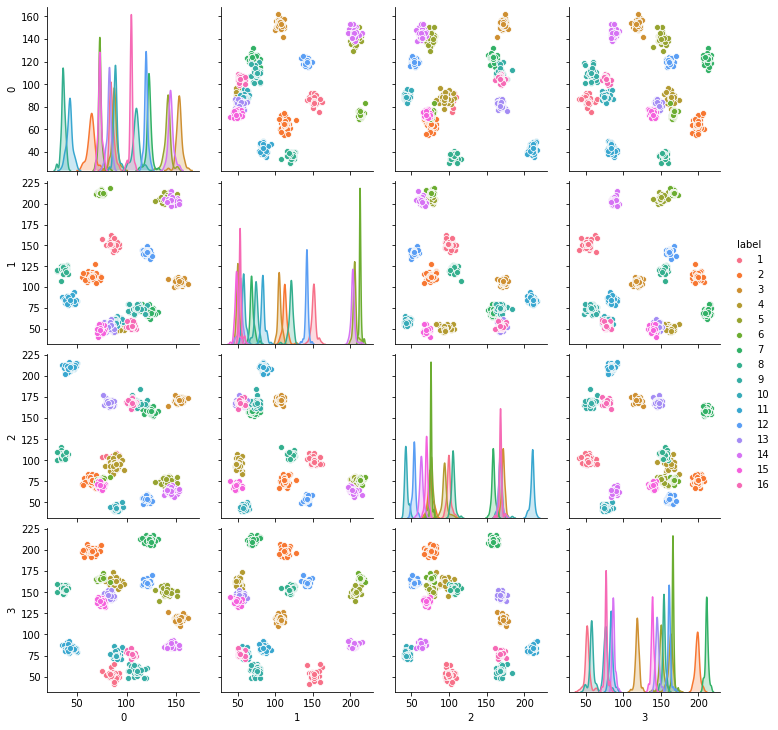

In [211]:
sns.pairplot(test, diag_kind="kde",hue='label')

### 2.4 Escalonando

Para aplicação dos algoritmos escalona-se os dados afim de parametriza-los num certo intervalor (-1 a 1)

In [212]:
data = data.to_numpy()
scaler = StandardScaler().fit(data)
data_scaler = scaler.transform(data)

In [213]:
# data_scaled = pd.DataFrame(data_scaler)
# data_scaled.head()

In [214]:
data_results = np.array(label[0].tolist())
for idx, value in np.ndenumerate(data_results):
    data_results[idx] = value - 1

### 2.5 Plotando boxsplot

Pelo boxsplot é possivel visualizar que há alguns outliers.

In [215]:
# data_scaled.plot(kind = 'box', figsize=(30,10), rot=90, )

## 3.2 Selecionando atributos do dataset

In [216]:
data_reduzida = pd.DataFrame(SelectKBest(chi2, k=30).fit_transform(data, label))
data_reduzida.shape
data_reduzida = data_reduzida.to_numpy()

data_scaler2 = scaler.fit_transform(X = data_reduzida)

In [217]:
# data_scaled2 = pd.DataFrame(data_scaler2)
# data_scaled2.head()



## Classificando

## Funções necessárias

In [218]:
def calcula_metricas(metricas, y_test, y_predict):
    metricas['acc'] += (accuracy_score(y_test, y_predict))
    metricas['recall'] += (recall_score(y_test, y_predict, average='micro'))
    metricas['precision'] += (precision_score(y_test, y_predict, average='macro'))
    metricas['f1'] += f1_score(y_test, y_predict, average='weighted')
    # metricas['roc'] += roc_auc_score(y_test, y_predict)
    metricas['kappa'] += cohen_kappa_score(y_test, y_predict)
    metricas['balanced_acc'] += balanced_accuracy_score(y_test, y_predict)

In [219]:
def save_metricas(name, metricas):
    f = open(name, 'w')
    f.write('Acuária:' + str(metricas['acc']) + '\n')
    f.write('Recall:' + str(metricas['recall']) + '\n')
    f.write('Precisão:' + str(metricas['precision']) + '\n')
    f.write('F-Measure:' + str(metricas['f1']) + '\n')
    # f.write('Curva Roc:' + str(metricas['roc']) + '\n')
    f.write('Indice Kappa:' + str(metricas['kappa']) + '\n')
    f.write('Acuária Balanceada:' + str(metricas['balanced_acc']) + '\n')
    f.close()

In [220]:
def show_metricas(metricas):
    print('Acuária:', metricas['acc'])
    print('Recall:', metricas['recall'])
    print('Precisão:', metricas['precision'])
    print('F-Measure:', metricas['f1'])
    # print('Curva Roc:', metricas['roc'])
    print('Indice Kappa:', metricas['kappa'])
    print('Acuária Balanceada:', metricas['balanced_acc'])

In [221]:
def write_metricas(name_file, metricas, metodo):
    f = open(name_file, "a")
    f.write(metodo + ',')
    f.write(str(round(metricas['acc'],4)) + ',')
    f.write(str(round(metricas['recall'],4)) + ',')
    f.write(str(round(metricas['precision'],4)) + ',')
    f.write(str(round(metricas['f1'],4)) + ',')
    # f.write(str(round(metricas['roc'],4)) + ';')
    f.write(str(round(metricas['kappa'],4)) + ',')
    f.write(str(round(metricas['balanced_acc'],4)) + '\n')
    f.close()

## Aplicando KNN com K-fold

## DataFrame Cru

In [222]:
formato = 'Cru'

folds_value = 16

In [223]:
# TODO change split function
kf = KFold(n_splits=2, shuffle=True, random_state=random.randint(0, 10))
data_kfold = kf.split(data)

train = []
test = []

for train_index, test_index in data_kfold:
    train.append(train_index)
    test.append(test_index)

In [224]:
name_file = 'metricas.csv'

# Roc;
f = open(name_file, "w")
f.write('Acurácia,Recall,Precisão,F1,Kappa,Acurácia Balanceada\n')
f.close()

## Aplicando KNN com K-fold

In [225]:

# 'roc': 0,
metodo = 'KNN'
metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'kappa': 0, 'balanced_acc': 0}

x_train, x_test, y_train, y_test = train_test_split(data_scaler, data_results)

neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(x_train, y_train)

y_predict = neigh.predict(x_test)

calcula_metricas(metricas, y_test, y_predict)

show_metricas(metricas)
write_metricas(name_file, metricas, metodo)

Acuária: 1.0
Recall: 1.0
Precisão: 1.0
F-Measure: 1.0
Indice Kappa: 1.0
Acuária Balanceada: 1.0


In [226]:
# # 'roc': 0,
# metodo = 'KNN'
# metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'kappa': 0, 'balanced_acc': 0}
#
# for train_index, test_index in zip(train, test):
#     x_train, x_test = data_scaler[train_index], data_scaler[test_index]
#     y_train, y_test = data_results[train_index], data_results[test_index]
#
#     neigh = KNeighborsClassifier(n_neighbors=100)
#     neigh.fit(x_train, y_train)
#
#     y_predict = neigh.predict(x_test)
#
#     calcula_metricas(metricas, y_test, y_predict)
#
# for metrica, value in metricas.items():
#     metricas[metrica] = value/10
#
# show_metricas(metricas)
# write_metricas(name_file, metricas, metodo)

## Aplicando GaussianNB com K-fold

In [227]:
metodo = 'Gauss'
metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}


x_train, x_test, y_train, y_test = train_test_split(data_scaler, data_results)

gauss = GaussianNB()
gauss.fit(x_train, y_train)

y_predict = gauss.predict(x_test)

calcula_metricas(metricas, y_test, y_predict)

show_metricas(metricas)
write_metricas(name_file, metricas, metodo)

Acuária: 1.0
Recall: 1.0
Precisão: 1.0
F-Measure: 1.0
Indice Kappa: 1.0
Acuária Balanceada: 1.0


In [228]:
# metodo = 'Gauss'
# metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}
#
# for train_index, test_index in zip(train, test):
#     x_train, x_test = data_scaler[train_index], data_scaler[test_index]
#     y_train, y_test = data_results[train_index], data_results[test_index]
#
#     gauss = GaussianNB()
#     gauss.fit(x_train, y_train)
#
#     y_predict = gauss.predict(x_test)
#
#     calcula_metricas(metricas, y_test, y_predict)
#
# for metrica, value in metricas.items():
#     metricas[metrica] = value/10
#
# show_metricas(metricas)
# write_metricas(name_file, metricas, metodo)

## Aplicando DecisionTreeClassifier com K-fold

In [229]:
metodo = 'Tree'
metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}

x_train, x_test, y_train, y_test = train_test_split(data_scaler, data_results)

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

y_predict = tree.predict(x_test)

calcula_metricas(metricas, y_test, y_predict)

show_metricas(metricas)
write_metricas(name_file, metricas, metodo)

Acuária: 0.9921875
Recall: 0.9921875
Precisão: 0.9930555555555556
F-Measure: 0.9922002655228759
Indice Kappa: 0.9916421808684296
Acuária Balanceada: 0.993421052631579


In [230]:
# metodo = 'Tree'
# metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}
#
# for train_index, test_index in zip(train, test):
#     x_train, x_test = data_scaler[train_index], data_scaler[test_index]
#     y_train, y_test = data_results[train_index], data_results[test_index]
#
#     tree = DecisionTreeClassifier()
#     tree.fit(x_train, y_train)
#
#     y_predict = tree.predict(x_test)
#
#     calcula_metricas(metricas, y_test, y_predict)
#
# for metrica, value in metricas.items():
#     metricas[metrica] = value/10
#
# show_metricas(metricas)
# write_metricas(name_file, metricas, metodo)

## Aplicando SVM com K-fold

In [231]:
metodo = 'SVM'
metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}

x_train, x_test, y_train, y_test = train_test_split(data_scaler, data_results)

svm = SVC()
svm.fit(x_train, y_train)

y_predict = svm.predict(x_test)

calcula_metricas(metricas, y_test, y_predict)

show_metricas(metricas)
write_metricas(name_file, metricas, metodo)

Acuária: 1.0
Recall: 1.0
Precisão: 1.0
F-Measure: 1.0
Indice Kappa: 1.0
Acuária Balanceada: 1.0


In [232]:
# metodo = 'SVM'
# metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}
#
# for train_index, test_index in zip(train, test):
#     x_train, x_test = data_scaler[train_index], data_scaler[test_index]
#     y_train, y_test = data_results[train_index], data_results[test_index]
#
#     svm = SVC()
#     svm.fit(x_train, y_train)
#
#     y_predict = svm.predict(x_test)
#
#     calcula_metricas(metricas, y_test, y_predict)
#
# for metrica, value in metricas.items():
#     metricas[metrica] = value/10
#
# show_metricas(metricas)
# write_metricas(name_file, metricas, metodo)

## DataFrame Selecionado

## Aplicando

In [233]:
kf = KFold(n_splits=2, shuffle=True, random_state=random.randint(0, 10))
data_kfold = kf.split(data_scaler2)

train = []
test = []

for train_index, test_index in data_kfold:
    train.append(train_index)
    test.append(test_index)

## Aplicando KNN com K-fold

In [234]:
metodo = 'KNNSELECT'
metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}

x_train, x_test, y_train, y_test = train_test_split(data_scaler, data_results)

neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(x_train, y_train)

y_predict = neigh.predict(x_test)

calcula_metricas(metricas, y_test, y_predict)

show_metricas(metricas)
write_metricas(name_file, metricas, metodo)

Acuária: 1.0
Recall: 1.0
Precisão: 1.0
F-Measure: 1.0
Indice Kappa: 1.0
Acuária Balanceada: 1.0


In [235]:
# metodo = 'KNNSELECT'
# metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}
#
# for train_index, test_index in zip(train, test):
#     x_train, x_test = data_scaler2[train_index], data_scaler2[test_index]
#     y_train, y_test = data_results[train_index], data_results[test_index]
#
#     neigh = KNeighborsClassifier(n_neighbors=20)
#     neigh.fit(x_train, y_train)
#
#     y_predict = neigh.predict(x_test)
#
#     calcula_metricas(metricas, y_test, y_predict)
#
# for metrica, value in metricas.items():
#     metricas[metrica] = value/10
#
# show_metricas(metricas)
# write_metricas(name_file, metricas, metodo)

## Aplicando GaussianNB com K-fold

In [236]:
metodo = 'GaussSELECT'
metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}

x_train, x_test, y_train, y_test = train_test_split(data_scaler, data_results)

gauss = GaussianNB()
gauss.fit(x_train, y_train)

y_predict = gauss.predict(x_test)

calcula_metricas(metricas, y_test, y_predict)

show_metricas(metricas)
write_metricas(name_file, metricas, metodo)

Acuária: 1.0
Recall: 1.0
Precisão: 1.0
F-Measure: 1.0
Indice Kappa: 1.0
Acuária Balanceada: 1.0


In [237]:
# metodo = 'GaussSELECT'
# metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}
#
# for train_index, test_index in zip(train, test):
#     x_train, x_test = data_scaler2[train_index], data_scaler2[test_index]
#     y_train, y_test = data_results[train_index], data_results[test_index]
#
#     gauss = GaussianNB()
#     gauss.fit(x_train, y_train)
#
#     y_predict = gauss.predict(x_test)
#
#     calcula_metricas(metricas, y_test, y_predict)
#
# for metrica, value in metricas.items():
#     metricas[metrica] = value/10
#
# show_metricas(metricas)
# write_metricas(name_file, metricas, metodo)

## Aplicando DecisionTreeClassifier com K-fold

In [238]:
metodo = 'TreeSELECT'
metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}

x_train, x_test, y_train, y_test = train_test_split(data_scaler, data_results)

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

y_predict = tree.predict(x_test)

calcula_metricas(metricas, y_test, y_predict)

show_metricas(metricas)
write_metricas(name_file, metricas, metodo)

Acuária: 0.984375
Recall: 0.984375
Precisão: 0.9844909750337382
F-Measure: 0.9845306385931386
Indice Kappa: 0.9832720738381115
Acuária Balanceada: 0.984046743697479


In [239]:
# metodo = 'TreeSELECT'
# metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}
#
# for train_index, test_index in zip(train, test):
#     x_train, x_test = data_scaler2[train_index], data_scaler2[test_index]
#     y_train, y_test = data_results[train_index], data_results[test_index]
#
#     tree = DecisionTreeClassifier()
#     tree.fit(x_train, y_train)
#
#     y_predict = tree.predict(x_test)
#
#     calcula_metricas(metricas, y_test, y_predict)
#
# for metrica, value in metricas.items():
#     metricas[metrica] = value/10
#
# show_metricas(metricas)
# write_metricas(name_file, metricas, metodo)

## Aplicando SVM com K-fold

In [240]:
metodo = 'SVMSELECT'
metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}

x_train, x_test, y_train, y_test = train_test_split(data_scaler, data_results)

svm = SVC()
svm.fit(x_train, y_train)

y_predict = svm.predict(x_test)

calcula_metricas(metricas, y_test, y_predict)

show_metricas(metricas)
write_metricas(name_file, metricas, metodo)

Acuária: 1.0
Recall: 1.0
Precisão: 1.0
F-Measure: 1.0
Indice Kappa: 1.0
Acuária Balanceada: 1.0


In [241]:
# metodo = 'SVMSELECT'
# metricas = {'acc': 0, 'recall': 0, 'precision': 0, 'f1': 0, 'roc': 0, 'kappa': 0, 'balanced_acc': 0}
#
# for train_index, test_index in zip(train, test):
#     x_train, x_test = data_scaler2[train_index], data_scaler2[test_index]
#     y_train, y_test = data_results[train_index], data_results[test_index]
#
#     svm = SVC()
#     svm.fit(x_train, y_train)
#
#     y_predict = svm.predict(x_test)
#
#     calcula_metricas(metricas, y_test, y_predict)
#
# for metrica, value in metricas.items():
#     metricas[metrica] = value/10
#
# show_metricas(metricas)
# write_metricas(name_file, metricas, metodo)

In [242]:
analise = './metricas.csv'
metricas = pd.read_csv(
    analise,
    )
metricas

,Acurácia,Recall,Precisão,F1,Kappa,Acurácia Balanceada
KNN,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Gauss,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Tree,0.9922,0.9922,0.9931,0.9922,0.9916,0.9934
SVM,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
KNNSELECT,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
GaussSELECT,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
TreeSELECT,0.9844,0.9844,0.9845,0.9845,0.9833,0.9840
SVMSELECT,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
